# Titanic data
EDA and model evaluation

In [822]:
#importing necessary libraries for visualization

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


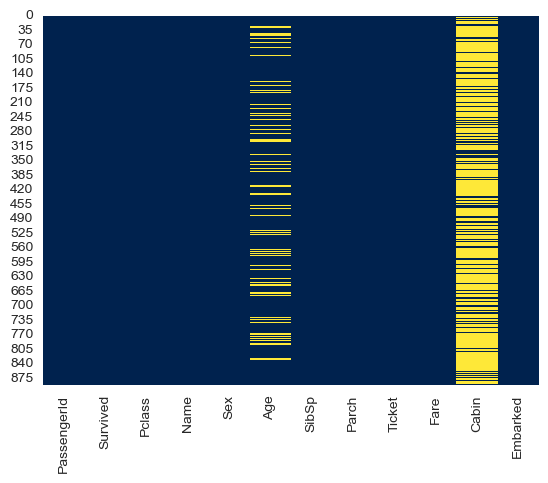

In [823]:
titanic_data= pd.read_csv('titanic_dataset.csv')

titanic_df= titanic_data

#check how many missing values
print(titanic_df.isnull().sum())
#heatmapt to show the distribution of missing values and what columns to drop
sns.heatmap(titanic_df.isnull(), cbar=False, cmap='cividis')
plt.show()


In [824]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# #  Some key info on the data set:
#Survival : 0 = No, 1 = Yes 

#SibSp : siblings/spouse on board

#Parch: children/parent on board

#Embarked: port of embark, bu we will drop that

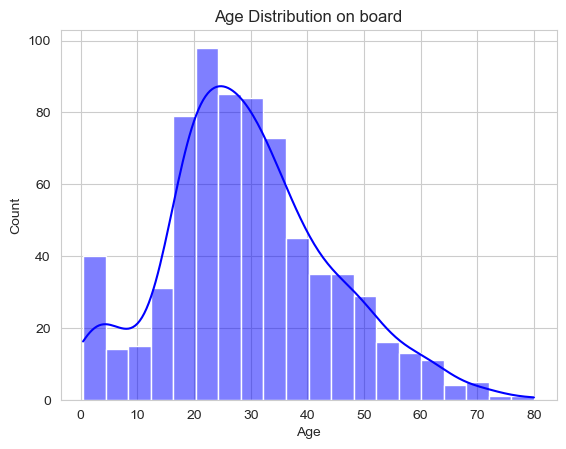

714


In [826]:
#hist plot of distribution of age on board, without removing the age missing values.




sns.histplot(titanic_df['Age'], kde=True)
plt.title('Age Distribution on board')
plt.show()
print(titanic_df['Age'].value_counts().sum())

In [827]:
#deal with missing values by replacing the median for age, the most frequent for embarked and drop the cabin column
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.drop(columns=['Cabin'], inplace=True)


In [828]:
#drop name  and ticket number as well as we won't need it 

titanic_df.drop(columns=['Name','Ticket'], inplace=True)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [829]:
print(titanic_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


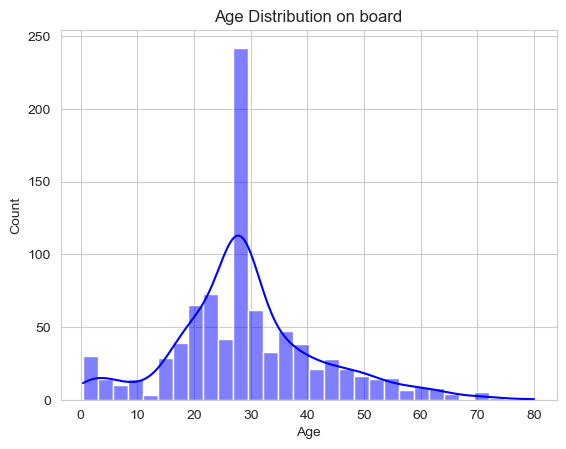

In [830]:
#histogram of age distribution after replacing age NaN with median
sns.histplot(titanic_df['Age'], kde=True)
plt.title('Age Distribution on board')
plt.show()

#from this and the following plot, we can see that the biggest age group on the Titanic was 25-35

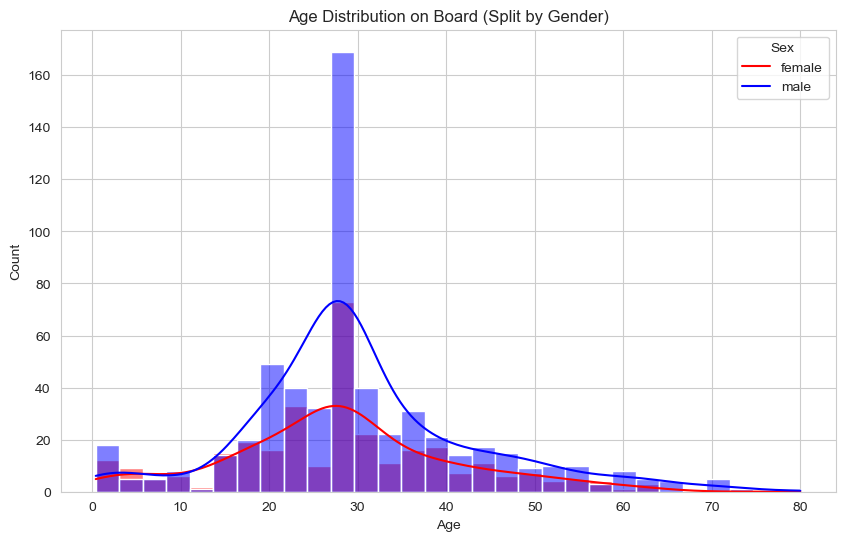

In [831]:
#better graph to show the age distribution split by gender

gender_div= titanic_df.groupby(['Sex'])

sns.set_style('whitegrid')
colors= {'male': 'blue', 'female':'red'}
sns.set_palette(colors.values())
# Create a histogram of age distribution split by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_df, x='Age', hue='Sex', bins=30, kde=True)
plt.title('Age Distribution on Board (Split by Gender)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['female', 'male'], facecolor='white')
plt.show()

#males around 30years of age appear to be the majority

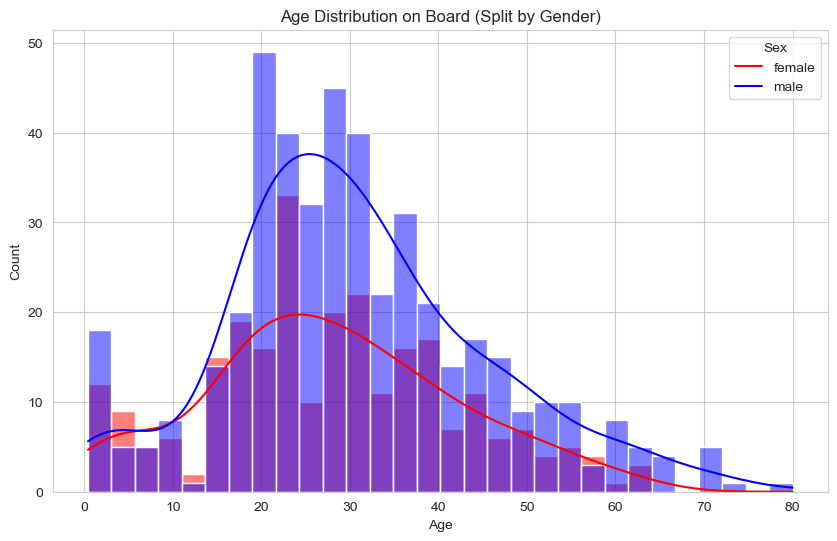

In [657]:
#better graph to show the age distribution split by gender without the age missing values

gender_div= dfmissing_age.groupby(['Sex'])

sns.set_style('whitegrid')
colors= {'male': 'blue', 'female':'red'}
sns.set_palette(colors.values())
# Create a histogram of age distribution split by gender
plt.figure(figsize=(10, 6))
sns.histplot(data=dfmissing_age, x='Age', hue='Sex', bins=30, kde=True)
plt.title('Age Distribution on Board (Split by Gender)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['female', 'male'], facecolor='white')
plt.show()

#males around 30years of age appear to be the majority

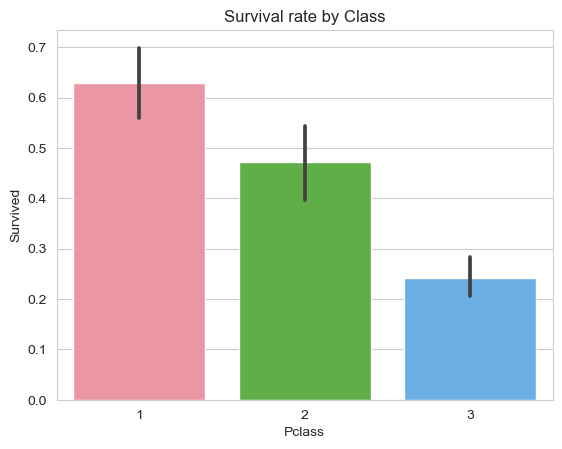

In [833]:
#survival rate by class
#survived is 1, not survived is 0 so it won't be summed
sns.barplot(x='Pclass', y='Survived', data= titanic_df)
plt.title('Survival rate by Class')
plt.show()

#first class has the highest survival rate, not surprising considering the life boats location facilitated 
#people in first class mainly. 
#third class was on  the lower levels of the ship, so struggled to get out on time before sinking

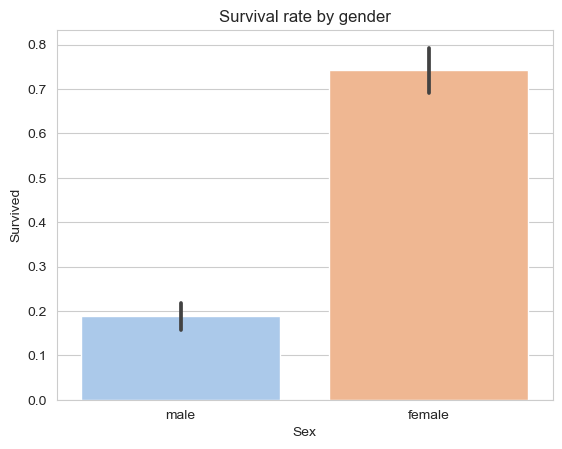

In [834]:
#survival rate by gender
sns.barplot(x='Sex', y='Survived', data= titanic_df, palette='pastel')
plt.title('Survival rate by gender')
plt.show()
#it's clear that females survival rate is higher as the idea was "Women and children first" 70% of survivors were women

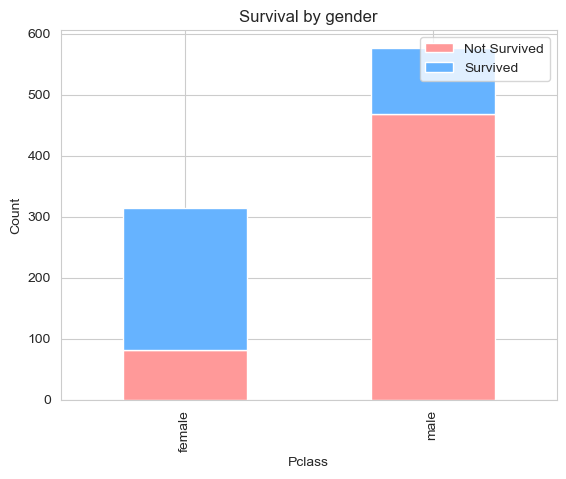

In [835]:
# Stacked bar chart: Survival by gender
class_survival = titanic_df.groupby(['Sex', 'Survived']).size().unstack()
class_survival.plot(kind='bar', stacked=True, color=['#ff9999','#66b3ff'])
plt.title('Survival by gender')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()



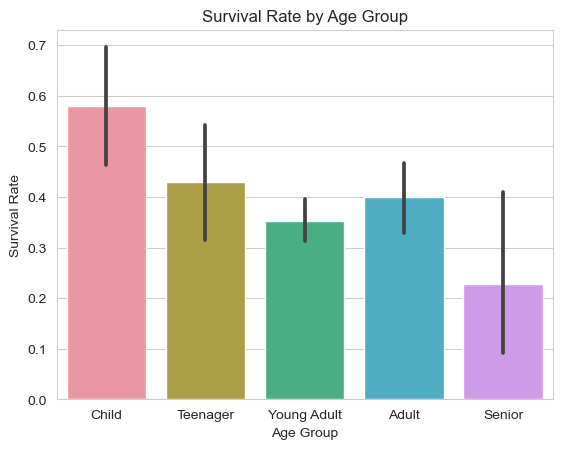

In [837]:
#Children and younger people had more chance of survival
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(data=titanic_df, x='AgeGroup', y='Survived')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

In [876]:
#transforming sex column into binary, male is 0 and female 1 and making sure Pclass is encoded correctly


new_df= titanic_df
from sklearn.preprocessing import LabelEncoder
new_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
new_df['Pclass'] = label_encoder.fit_transform(titanic_df['Pclass'])


new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,2,0,22.0,1,0,7.2500,S,Young Adult
1,2,1,0,1,38.0,1,0,71.2833,C,Adult
2,3,1,2,1,26.0,0,0,7.9250,S,Young Adult
3,4,1,0,1,35.0,1,0,53.1000,S,Young Adult
4,5,0,2,0,35.0,0,0,8.0500,S,Young Adult


In [868]:
#calculation to see that there were 577 males and 314 females


print(new_df['Sex'].value_counts())
print(new_df['Survived'].value_counts())

Sex
0    577
1    314
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64


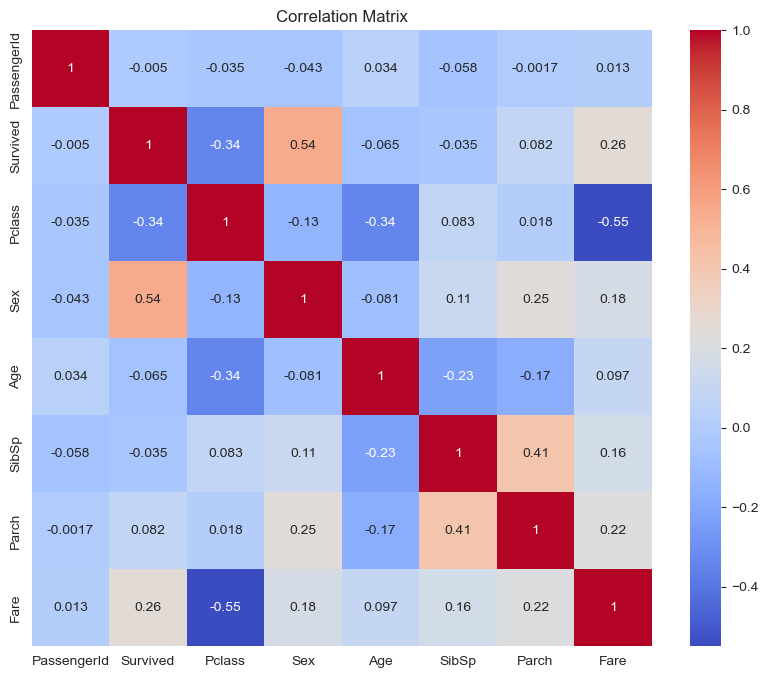

In [869]:
#Correlation matrix between the different variables

numeric_data= new_df.select_dtypes(include='number')
corr_matrix= numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

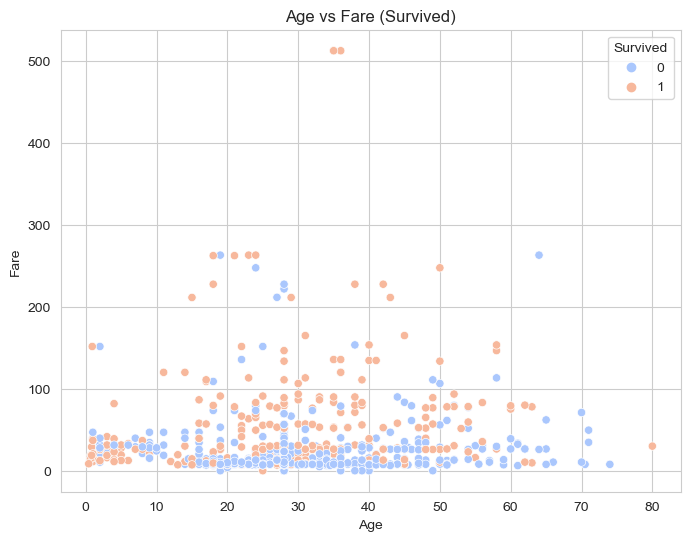

In [870]:

#scatter of fare price against survival. The highest the fare, the more chance of surviving
#as 1st class was the one with more survivors
plt.figure(figsize=(8, 6))
sns.scatterplot(data=new_df, x='Age', y='Fare', hue='Survived', palette='coolwarm')
plt.title('Age vs Fare (Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

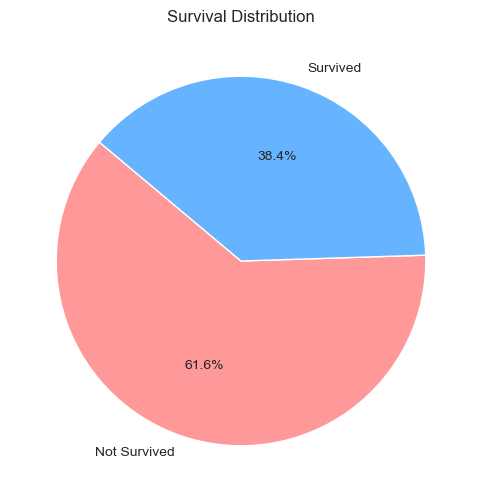

In [871]:
#Pie chart to show the percentage of survival


survived_counts =new_df['Survived'].value_counts()
gender_count =new_df['Sex'].value_counts()
colors=['#ff9999','#66b3ff']


plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=140, colors= colors)
plt.title('Survival Distribution')
plt.show()


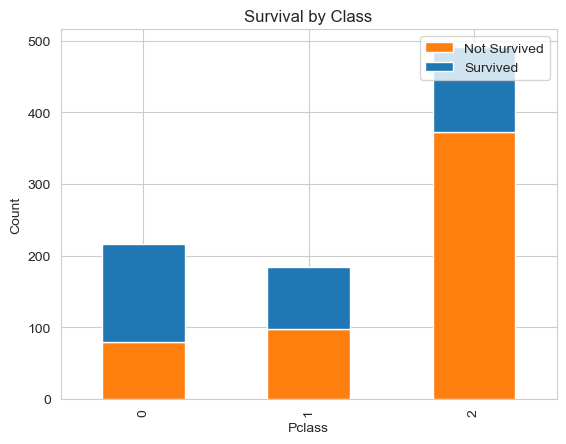

In [872]:
# Stacked bar chart: Survival by class
class_survival = new_df.groupby(['Pclass', 'Survived']).size().unstack()
class_survival.plot(kind='bar', stacked=True, color=['#ff7f0e', '#1f77b4'])
plt.title('Survival by Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()



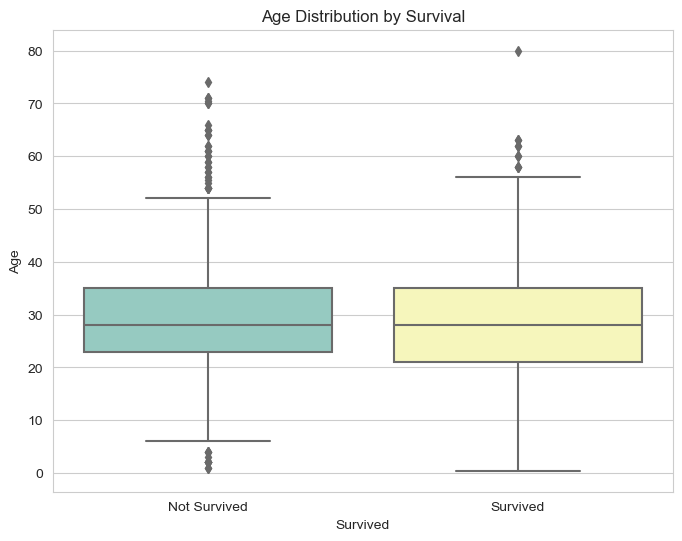

In [873]:
# Box plot: Age distribution by survival
plt.figure(figsize=(8, 6))
sns.boxplot(data=new_df, x='Survived', y='Age', palette='Set3')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

#the age distributions is relatively similar for survived and not survived. 
#There is an outlier in the survived ones, around 80yrs old. Probably Rose! 

In [874]:
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,1,0,2,0,22.0,1,0,7.2500,S,Young Adult
1,2,1,0,1,38.0,1,0,71.2833,C,Adult
2,3,1,2,1,26.0,0,0,7.9250,S,Young Adult
3,4,1,0,1,35.0,1,0,53.1000,S,Young Adult
4,5,0,2,0,35.0,0,0,8.0500,S,Young Adult


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


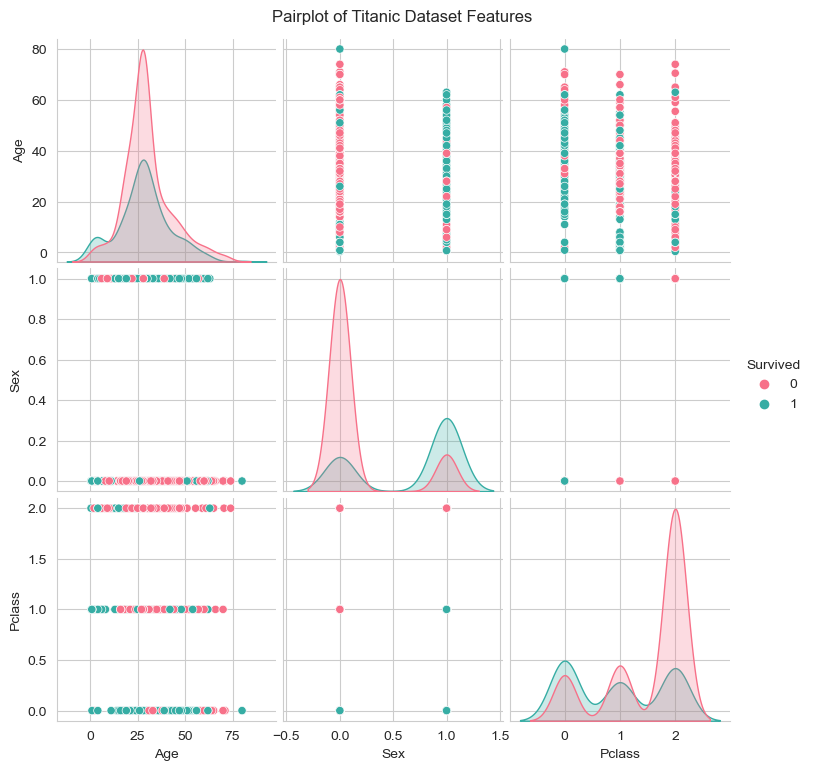

In [875]:
sns.pairplot(new_df, vars=['Age', 'Sex', 'Pclass'], hue='Survived', palette='husl')
plt.suptitle('Pairplot of Titanic Dataset Features', y=1.02)
plt.show()

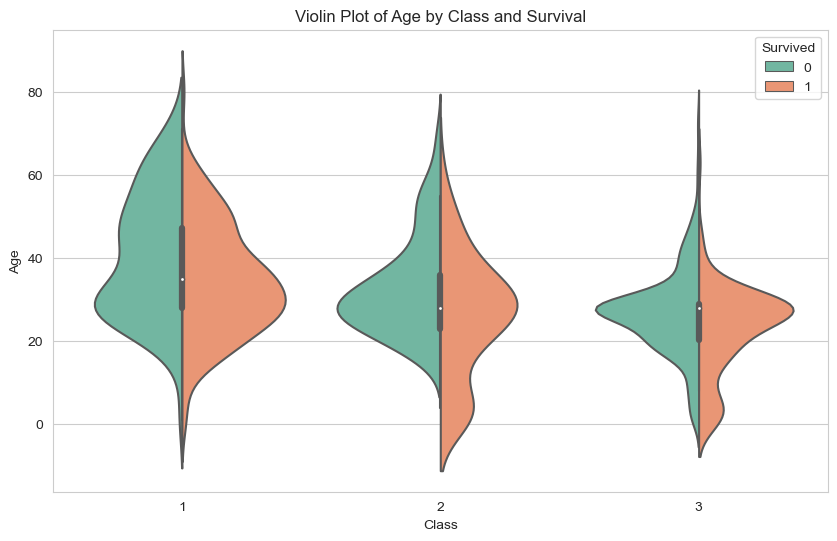

In [670]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=new_df, x='Pclass', y='Age', hue='Survived', split=True, palette='Set2')
plt.title('Violin Plot of Age by Class and Survival')
plt.xlabel('Class')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()

# # Model evaluations

In [849]:
#Now we want to try couple of models to predict the survival
#Decision tree/Logistic Regression/


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,jaccard_score, f1_score, confusion_matrix

import sklearn.metrics as metrics

In [852]:
label_encoder = LabelEncoder()


In [877]:
#We will predict the survival based on age, class and gender

features=['Pclass','Sex','Age']
x=new_df[features]
y=new_df['Survived']
print(x.head())
print(y.head())

   Pclass  Sex   Age
0       2    0  22.0
1       0    1  38.0
2       2    1  26.0
3       0    1  35.0
4       2    0  35.0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [891]:
#split the dataset into training and testing

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [892]:
#instance a decision tree classifie and fit it on the train set

model= DecisionTreeClassifier(random_state=42)


model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [893]:
#get predictions of the model in the x_test set
y_pred= model.predict(x_test)
y_pred.shape

(268,)

In [909]:
print(y_test.shape)
print(y_train.shape)

(268,)
(623,)


In [926]:
accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [896]:
print(y_pred[0:7])
print(y_test[0:7])

[0 0 0 1 0 0 1]
709    1
439    0
840    0
720    1
39     1
290    1
300    1
Name: Survived, dtype: int64


In [924]:
#testing the decisiontree model with cross_val_score 
#to evaluate model performance
#df with the result values



dt_accuracy= cross_val_score(model, x,y, cv=5, scoring='accuracy').mean()

dt_f1score= cross_val_score(model,x,y, cv=5, scoring='f1').mean()

dt_precision= cross_val_score(model,x,y,cv=5, scoring='precision').mean()
dt_recall= cross_val_score(model,x,y ,cv=5, scoring='recall').mean()

#create a Data frame of the metrics for viz.
dt_results=[dt_accuracy, dt_f1score, dt_recall, dt_precision]
dt_crossval_report= pd.DataFrame([dt_results], columns=['Accuracy','F1score','Recall', 'Precision'])
dt_crossval_report.index=['Decision Tree Classifier']
dt_crossval_report

,Accuracy,F1score,Recall,Precision
Decision Tree Classifier,0.801387,0.714,0.649318,0.796814


In [925]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       157
           1       0.76      0.64      0.69       111

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [907]:
#metrics of MAE, MSE and r2 into a DF to hold the values

dt_mae= metrics.mean_absolute_error(y_test, y_pred)

dt_mse= metrics.mean_squared_error(y_test, y_pred)

dt_r2=metrics.r2_score(y_test, y_pred)

dt_result=[dt_mae, dt_mse, dt_r2]
dt_report= pd.DataFrame([result],columns=['MAE', 'MSE', 'R2'])
dt_report

,MAE,MSE,R2
0,0.235075,0.235075,0.031159


In [900]:
#now a logistic regression model
lr= LogisticRegression()
lr.fit(x_train, y_train)


LogisticRegression()

In [905]:
ypred= lr.predict(x_test)
ypred[0:7]


array([0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [902]:
#we calculate the accuracy score on our test data/predictions
accuracy_lr = accuracy_score(y_test, ypred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.81


In [903]:
#metrics of MAE, MSE and r2 into a DF to hold the values

Logisticreg_MAE = metrics.mean_absolute_error(y_test, ypred)
Logisticreg_MSE = metrics.mean_squared_error(y_test, ypred)
Logisticreg_R2 = metrics.r2_score(y_test, ypred)
lr_results=[Logisticreg_MAE, Logisticreg_MSE ,Logisticreg_R2]
lr_report=pd.DataFrame([lr_results], columns=['MAE','MSE', 'R2'])
lr_report

,MAE,MSE,R2
0,0.190299,0.190299,0.2157


In [932]:
#cross validation on logistic regression model 

lr_accuracy= cross_val_score(lr, x,y, cv=5, scoring='accuracy').mean()
lr_f1score=cross_val_score(lr,x,y,cv=5, scoring='f1').mean()
lr_recall= cross_val_score(lr,x,y, cv=5, scoring='recall').mean()
lr_precision= cross_val_score(lr, x,y,cv=5, scoring='precision').mean()
lr_cross_val_results=[lr_accuracy, lr_f1score, lr_recall, lr_precision]

lr_report_cross_val=pd.DataFrame([lr_cross_val_results], columns=('Accuracy','F1score', 'Recall', 'Precision')
                    )
lr_report_cross_val.index=['Logistic Regression']
lr_report_cross_val

,Accuracy,F1score,Recall,Precision
Logistic Regression,0.786755,0.714591,0.698721,0.73553


In [756]:
#concatenate the two df, the Dt and LR metrics
metrics_to_df= pd.concat([dt_crossval_report, lr_report_cross_val], ignore_index=False)
metrics_to_df

,Accuracy,F1score,Recall,Precision
Decision Tree Classifier,0.801387,0.714000,0.649318,0.796814
Logistic Regression,0.786755,0.714591,0.698721,0.735530


In [915]:
#function to create confusion matrix 
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

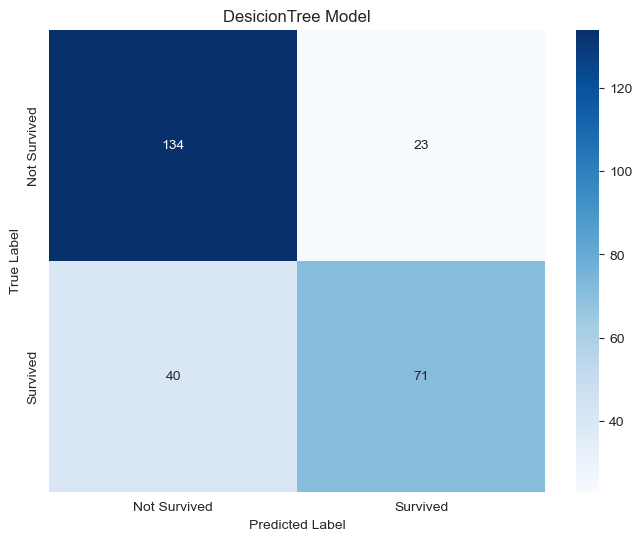

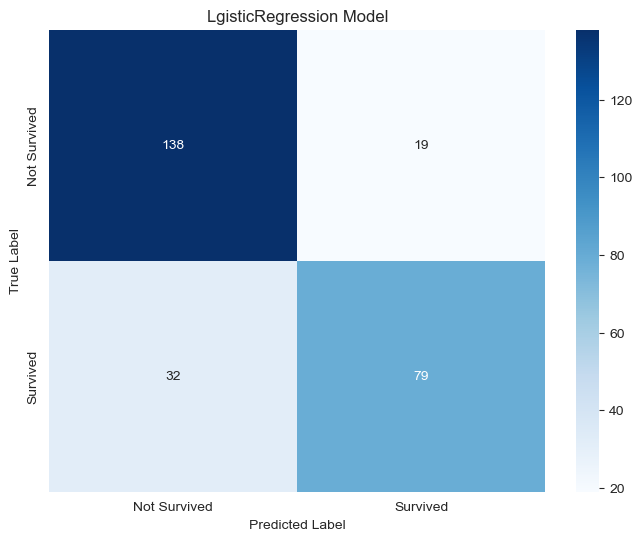

In [933]:
#confusion matrix for both Dt and LR

cm_dt= confusion_matrix(y_test, y_pred)
cm_lr=confusion_matrix(y_test, ypred)

plot_confusion_matrix(cm_dt, 'DesicionTree Model')
plot_confusion_matrix(cm_lr,'LgisticRegression Model')

In [940]:
#convert the confusion matrices to Dataframe to export to csv
cm_dt_df=pd.DataFrame(cm_dt, columns=['Predicted not survived', 'Predicted survived'])

cm_lr_df=pd.DataFrame(cm_lr, columns=['Predicted not survived', 'Predicted survived'])
cm_dt_df.to_csv('cm_dt.csv')
cm_lr_df.to_csv('cm_lr.csv')

In [971]:
#convert all the metrics scores into a data frame
metrics={
    'Model':['Decision Tree', 'Logistic Regression'],
    'Accuracy':[dt_accuracy, lr_accuracy],
    'F1 Score':[dt_f1score, lr_f1score],
    'Recall':[dt_recall, lr_recall],
    'Precision' : [dt_precision, lr_precision],
    
}
metrics_to_df= pd.DataFrame(metrics)
metrics_to_df.to_csv('metrics.csv')
metrics_to_df

,Model,Accuracy,F1 Score,Recall,Precision
0,Decision Tree,0.801387,0.714000,0.649318,0.796814
1,Logistic Regression,0.786755,0.714591,0.698721,0.735530


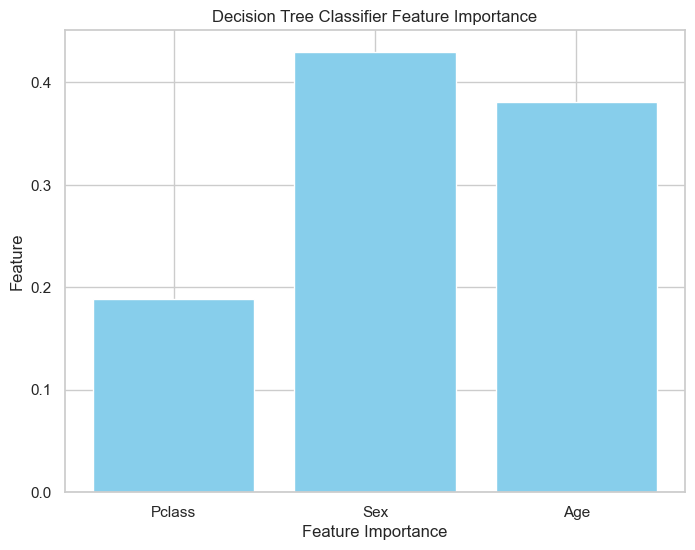

In [974]:
# Bar graph to show feature importance on the DecisionTree classifier
dt_feature_importance =model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(features, dt_feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Classifier Feature Importance')
plt.show()

#Gender has a bigger relevance to survival compared to class and age

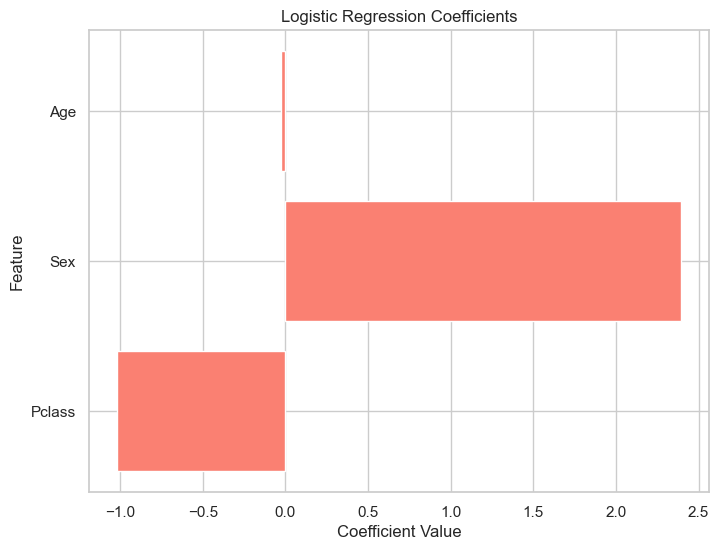

In [975]:
lr_coefficients = lr.coef_[0]
plt.figure(figsize=(8, 6))
plt.barh(features, lr_coefficients, color='salmon')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()

In [976]:
#some model predictions on synthetic data:
#Pclass 0=first, 1=second, 2=third
#sex 0= male, 1= female

new_data=[['0','0','35'], ['1', '0','54'],['2','0','35'],['2','0','78'],['0','1','35'],['2','1','20']]
column_names=['Pclass', 'Sex', 'Age']
new_data= pd.DataFrame(new_data, columns=column_names)

In [977]:
#predictions: 0=not survived, 1= survived
dt_predict=model.predict(new_data)
print('Decision Tree Classifier predictions:', dt_predict)

Decision Tree Classifier predictions: [1 0 0 0 1 0]


In [978]:
lr_predict= lr.predict(new_data)
print('Logistic Regression predictions:', lr_predict)

Logistic Regression predictions: [0 0 0 0 1 1]


In [979]:
new_df.to_csv('new_df.csv')

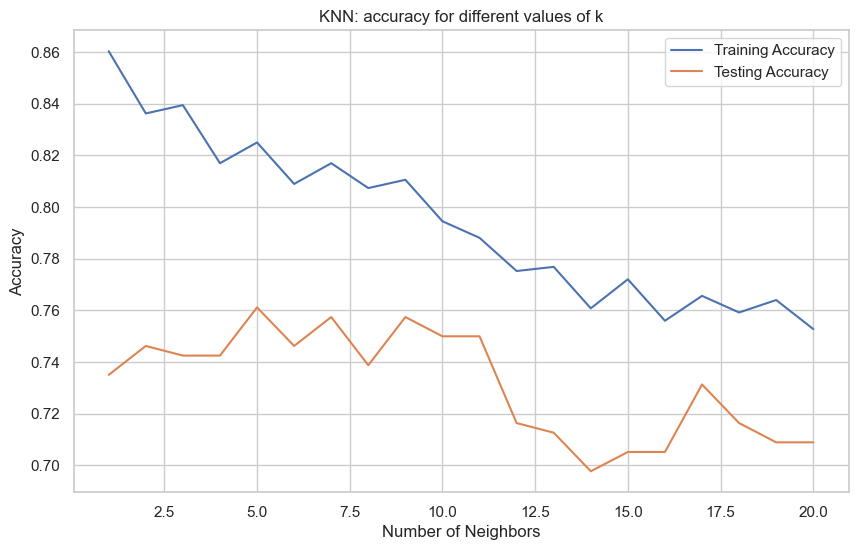

In [980]:
#last model, cause why not. KNN classifier
from sklearn.neighbors import KNeighborsClassifier

neighbors_range= range(1,21)
train_accuracies=[]
test_accuracies=[]

for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)  # You can choose a different value for n_neighbors
    knn.fit(x_train, y_train)
    train_accuracy= accuracy_score(y_train, knn.predict(x_train))
    train_accuracies.append(train_accuracy)
    
    test_accuracy=accuracy_score(y_test, knn.predict(x_test))
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10,6))

plt.plot(neighbors_range, train_accuracies, label="Training Accuracy")
plt.plot(neighbors_range, test_accuracies, label="Testing Accuracy")
plt.title("KNN: accuracy for different values of k")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()